In [45]:
import numpy as np
import pandas as pd

In [46]:
data = pd.read_csv("test_2.csv")

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Discipline                     300 non-null    object
 1   Question                       300 non-null    object
 2   Reason you think it is faulty  300 non-null    object
 3   Which top LLM you tried        300 non-null    object
 4   Response by a top LLM          300 non-null    object
 5   T_2                            300 non-null    object
dtypes: object(6)
memory usage: 14.2+ KB


In [48]:
data.head()

,Discipline,Question,Reason you think it is faulty,Which top LLM you tried,Response by a top LLM,T_2
0,Biology,Which of the following statements about cell m...,multiple plausible options and doesnt contain ...,GPT4o-mini,All the provided statements about cell membran...,To determine which statement about cell membra...
1,Biology,Which mechanism is NOT a legitimate way geneti...,multiple plausible options and doesnt contain ...,GPT4o-mini,D) Gene mutations caused by environmental radi...,Let's evaluate each option to determine if it ...
2,Biology,Which statement about natural selection is sci...,multiple plausible options and doesnt contain ...,GPT4o-mini,All the statements provided are accurate descr...,Let's analyze each statement step by step to i...
3,Biology,Which claim about microorganisms is MOST MISLE...,multiple plausible options and doesnt contain ...,GPT4o-mini,All the options provided are true statements a...,To determine which claim about microorganisms ...
4,Biology,Which function is NOT associated with the huma...,multiple plausible options and doesnt contain ...,GPT4o-mini,D) Regulating hormonal responses,To determine which function is NOT associated ...


In [49]:
data['Result'] = data['T_2'].apply(lambda text: 1 if 'MISSING' in text else 0)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Discipline                     300 non-null    object
 1   Question                       300 non-null    object
 2   Reason you think it is faulty  300 non-null    object
 3   Which top LLM you tried        300 non-null    object
 4   Response by a top LLM          300 non-null    object
 5   T_2                            300 non-null    object
 6   Result                         300 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 16.5+ KB


In [51]:
data.nunique()

Discipline                         6
Question                         300
Reason you think it is faulty      2
Which top LLM you tried            1
Response by a top LLM            300
T_2                              300
Result                             2
dtype: int64

In [52]:
# Export the combined DataFrame to a CSV file
output_csv = 'test_2__final.csv'  # Change this to your desired file path
data.to_csv(output_csv, index=False)

print(f"DataFrame stacked and saved to: {output_csv}")

DataFrame stacked and saved to: test_2__final.csv


In [54]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


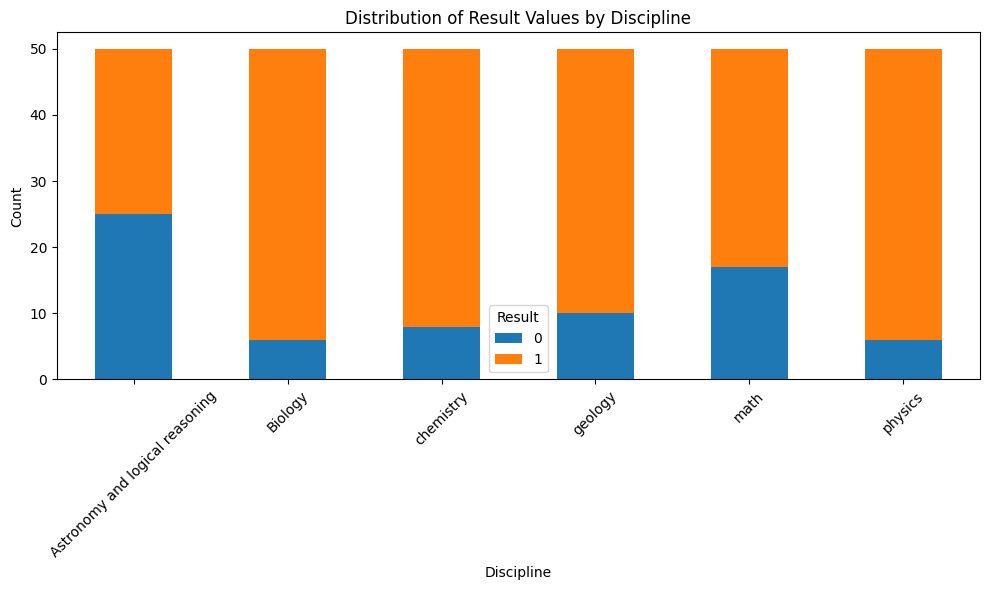

In [55]:
# Group data by Discipline and Result, then count occurrences
result_counts = data.groupby(['Discipline', 'Result']).size().unstack(fill_value=0)

# Plot the data
result_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

# Customize the plot
plt.title('Distribution of Result Values by Discipline')
plt.xlabel('Discipline')
plt.ylabel('Count')
plt.legend(title='Result', labels=['0', '1'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

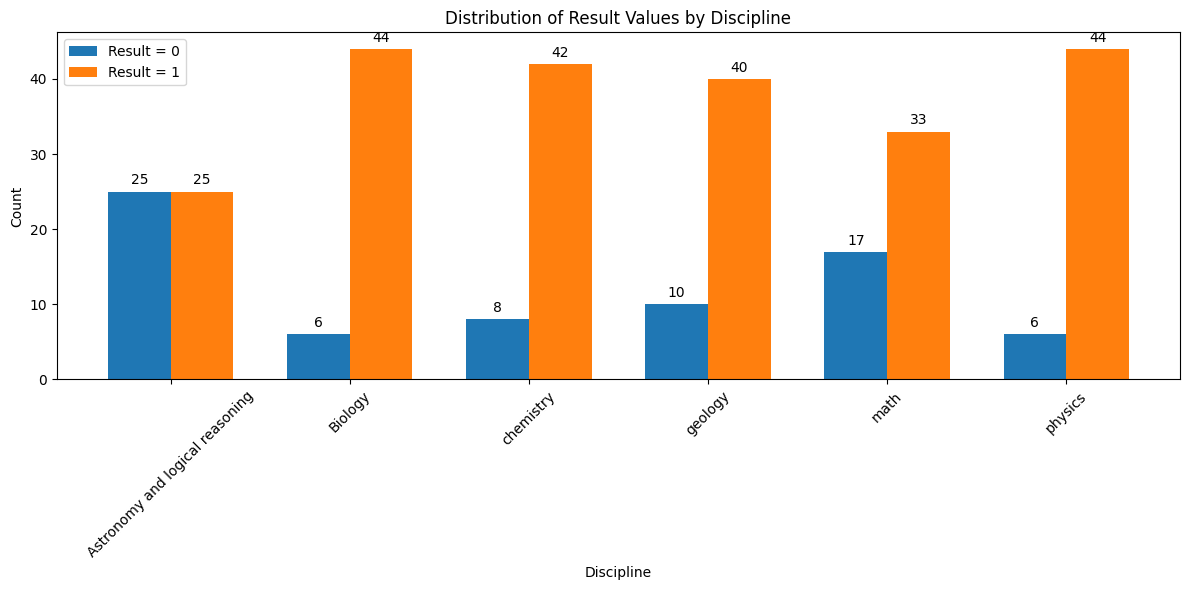

In [56]:
# Group data by Discipline and Result, then count occurrences
result_counts = data.groupby(['Discipline', 'Result']).size().unstack(fill_value=0)

# Prepare data for side-by-side bar plot
x = np.arange(len(result_counts))  # X-axis positions for disciplines
bar_width = 0.35  # Width of each bar

# Plot the bars
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - bar_width/2, result_counts[0], bar_width, label='Result = 0')
bars2 = ax.bar(x + bar_width/2, result_counts[1], bar_width, label='Result = 1')

# Add labels, title, and legend
ax.set_xlabel('Discipline')
ax.set_ylabel('Count')
ax.set_title('Distribution of Result Values by Discipline')
ax.set_xticks(x)
ax.set_xticklabels(result_counts.index, rotation=45)
ax.legend()

# Add value annotations on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()